In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.dates as md
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
plt.style.use('ggplot')

In [5]:
def plot_dict(dictionary, csv_path, title, ylabel, log_scale, save_path=None, ylim=None):
    fig, ax = plt.subplots()

    for k, v in dictionary.items():
        data = pd.read_csv(f'{csv_path}/{v}')
        rel_time = pd.to_datetime(data.iloc[:,0] - data.iloc[0,0], unit="s")
        fids = data.iloc[:,2]
        ax.plot(md.date2num(rel_time), fids, label=k)

    x_formatter = md.DateFormatter('%H:%M:%S')
    ax.xaxis.set_major_formatter(x_formatter)
    ax.set_title(title)
    if log_scale:
        ax.set_yscale("log")
        ylabel += " (log)"
    ax.set_ylabel(ylabel)
    if ylim is not None:
        ax.set_ylim(top=ylim)
    ax.set_xlabel("Relative Time (in h:m:s)")
    # ax.set_xticks(md.date2num(pd.to_datetime([i * 3600 for i in range(13)], unit="s")))
    ax.set_xlim(0, md.date2num(pd.to_datetime(3600*11, unit="s")))
    ax.legend(facecolor='white', fancybox=True, shadow=True)
    if save_path is not None:
        plt.savefig(save_path, bbox_inches="tight")
    plt.show()

# Best models

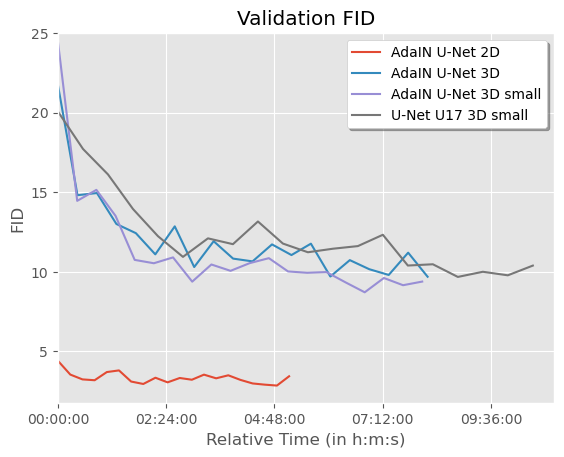

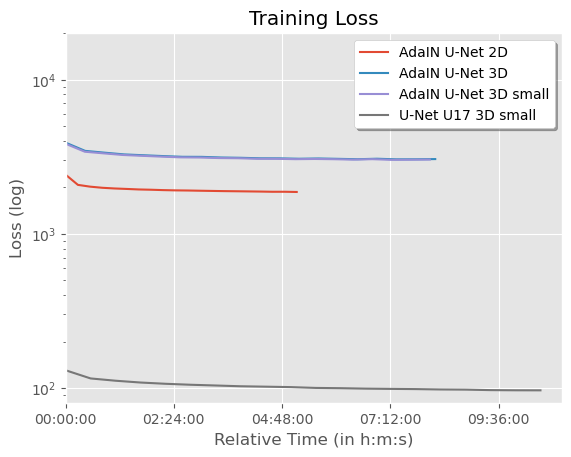

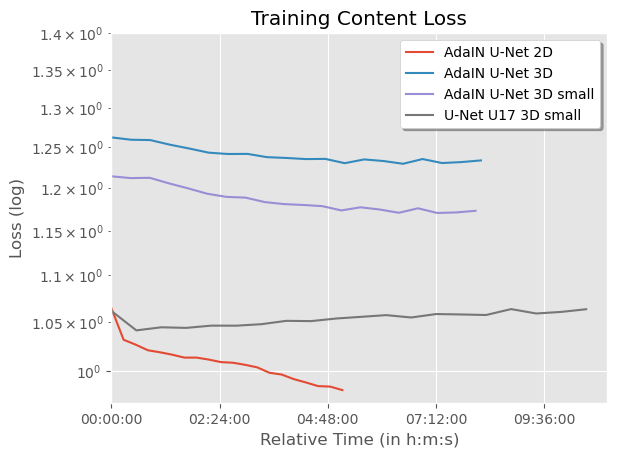

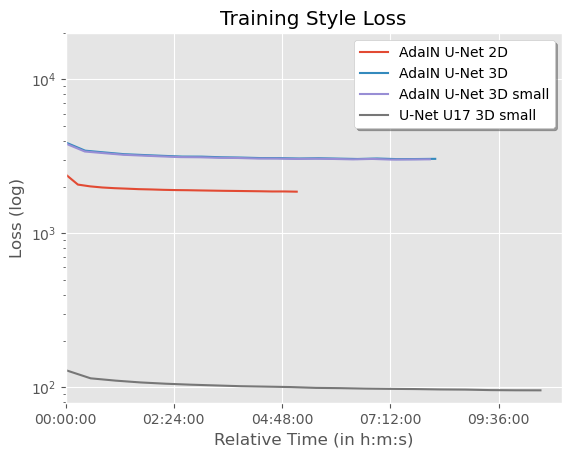

In [10]:
d = {
    "AdaIN U-Net 2D": "2d/unet/gram_loss/lr:0.001-style_weight:1000000.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    "AdaIN U-Net 3D": "3d/unet/gram_loss/lr:0.001-style_weight:1000000.0-weight_decay:0-lr_decay:1-small_style:False/version_0".replace("/", "_").replace(":", "_") + ".csv",
    "AdaIN U-Net 3DS": "3d/unet/gram_loss/lr:0.001-style_weight:1000000.0-weight_decay:0-lr_decay:1-small_style:True/version_0".replace("/", "_").replace(":", "_") + ".csv",
    "U-Net 3DS": "3d/u17/adain_loss/lr:0.0001-style_weight:100.0-weight_decay:0-lr_decay:1-small_style:True/version_0".replace("/", "_").replace(":", "_") + ".csv",
}
save_prefix = "./training/"
plot_dict(d, "./training/val-fid", "Validation FID", "FID", False, f"{save_prefix}fid.png", ylim=25)
plot_dict(d, "./training/loss-total", "Training Loss", "Loss", True, f"{save_prefix}loss.png", ylim=2e4)
plot_dict(d, "./training/loss-content", "Training Content Loss", "Loss", True, f"{save_prefix}content.png", ylim=1.4)
plot_dict(d, "./training/loss-style", "Training Style Loss", "Loss", True, f"{save_prefix}style.png", ylim=2e4)